In [1]:
import numpy as np
from random import randint
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

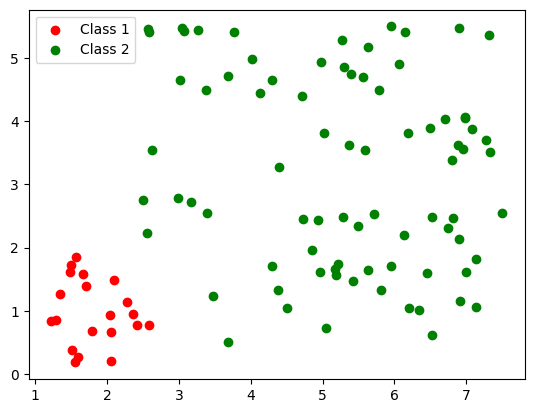

In [2]:
def data_points(n_samples, class_point, noise=1):
    def offset_point():
        offset_x = randint(-100 * noise, noise * 100) / 100
        offset_y = randint(-100 * noise, noise * 100) / 100
        x = class_point[0] + offset_x
        y = class_point[1] + offset_y
        return x, y

    points = [offset_point() for _ in range(n_samples)]
    x_list = [points[i][0] for i in range(n_samples)]
    y_list = [points[i][1] for i in range(n_samples)]

    return x_list, y_list

x1_list, y1_list = data_points(n_samples=20, class_point=(2, 1), noise=0.9)
x2_list, y2_list = data_points(n_samples=80, class_point=(5, 3), noise=2.5)

plt.scatter(x=x1_list, y=y1_list, color='red', label="Class 1")
plt.scatter(x=x2_list, y=y2_list, color='green', label="Class 2")
plt.legend()
plt.show()

In [3]:
X1 = np.array([x1_list, y1_list]).T  # Матрица X1: точки класса 1
X2 = np.array([x2_list, y2_list]).T  # Матрица X2: точки класса 2

print("Матрица X1:\n", X1)
print("Матрица X2:\n", X2)

Матрица X1:
 [[1.22 0.83]
 [2.42 0.78]
 [2.27 1.13]
 [1.6  0.26]
 [2.04 0.93]
 [1.48 1.62]
 [1.51 0.37]
 [1.55 0.18]
 [1.35 1.26]
 [1.71 1.39]
 [2.06 0.2 ]
 [1.66 1.58]
 [1.79 0.68]
 [2.58 0.78]
 [2.36 0.94]
 [1.57 1.85]
 [2.09 1.49]
 [2.06 0.66]
 [1.29 0.85]
 [1.5  1.72]]
Матрица X2:
 [[3.76 5.41]
 [5.29 2.48]
 [4.38 1.33]
 [4.86 1.96]
 [6.15 5.42]
 [6.82 2.46]
 [6.19 3.82]
 [6.71 4.03]
 [5.81 1.32]
 [2.98 2.79]
 [6.9  2.13]
 [3.38 4.49]
 [7.   1.62]
 [4.02 4.99]
 [2.58 5.41]
 [5.39 4.75]
 [5.19 1.57]
 [5.49 2.34]
 [5.59 3.54]
 [5.18 1.66]
 [3.27 5.44]
 [5.63 5.18]
 [4.39 3.27]
 [5.56 4.7 ]
 [5.42 1.47]
 [5.37 3.62]
 [4.3  4.66]
 [7.33 3.51]
 [4.5  1.05]
 [2.5  2.76]
 [4.98 4.94]
 [6.5  3.89]
 [5.21 1.74]
 [3.69 4.71]
 [5.3  4.86]
 [6.98 4.06]
 [3.48 1.23]
 [2.57 5.46]
 [6.13 2.2 ]
 [6.53 2.49]
 [7.14 1.06]
 [7.5  2.54]
 [6.52 0.61]
 [5.63 1.64]
 [5.95 5.5 ]
 [4.29 1.71]
 [5.72 2.53]
 [2.56 2.23]
 [6.21 1.04]
 [7.32 5.36]
 [7.08 3.88]
 [2.62 3.55]
 [5.78 4.49]
 [3.17 2.72]
 [3.02 4.66

Точность модели: 1.00


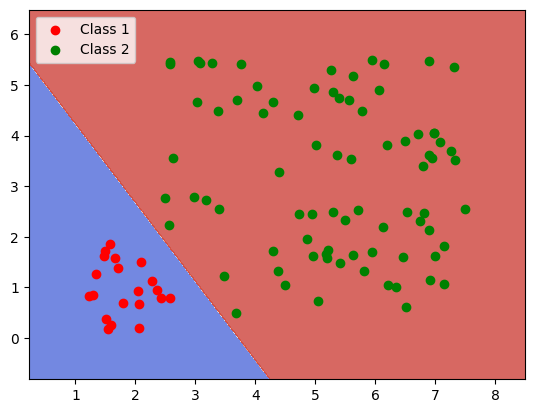

In [4]:
y1 = [0] * len(X1)
y2 = [1] * len(X2)

X = np.vstack((X1, X2))
y = np.array(y1 + y2)

model = LogisticRegression(solver='lbfgs', max_iter=7000)
model.fit(X, y)

y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Точность модели: {accuracy:.2f}")

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X1[:, 0], X1[:, 1], color='red', label='Class 1')
plt.scatter(X2[:, 0], X2[:, 1], color='green', label='Class 2')
plt.legend()
plt.show()